Code to analyse the boundary search done in the HMS O2 computing cluster.

previous note:
I run out of disk space for those with p=10, which I am repeating as of Jan 17 2022. The rest are finished, converged and good. For p=10, it is extremely slow. After 30 days, the job that was able to run more iterations run 400. As of Feb 21, I am continuing but setting convergence to 1000.

In [1]:
import sys,os
sys.path.append("../bin")
from import_paths import path_to_eigen, path_to_utilsGRF, path_to_utilsGRF_
sys.path.append(path_to_utilsGRF_)
import AnalyseBoundarysearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import BoundaryFinder as BF
import alphashape
import time

In [2]:
datafolder='/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb'
#datafolder='../clustersearch/'
subfolder="2021_12_13_N4MWC"
subfolder2="2021_12_13_N4MWC_scratch"
folder1=os.path.join(datafolder,subfolder)
folder2=os.path.join(datafolder,subfolder2)
print(folder1)
print(folder2)
ashapesfolder="./ashapes"
jid="45989748"
njobs=80
basename="N4MWC"

name_ashape="ashape_%s"%basename
extremespars=[[1e-3,1e3],[1e-5,1e5],[1e-7,1e7],[1e-9,1e9],[1e-10,1e10]] #copy-paste from the boundary search
absder="True" #in this case it doesn´t matter because it is monotonically increasing


/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4MWC
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4MWC_scratch


In [3]:
checkf=os.path.join(datafolder, "2021_12_13_N4MWC/tocheck_N4MWC") 
#tolerance 0.005
print(checkf)
command="wolframscript -file ../bin/N4MWC_manualfix_count.wl '%s' '%s'"%(checkf,absder)  #note that here I have not renamed the files written prevoiusly, so they are overwritten
! $command

/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4MWC/tocheck_N4MWC
First line
absder True
starting at
/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4MWC/tocheck_N4MWC
Defined GRF
mat_N4MWC_0.in
mat_N4MWC_0_checked.out

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.
1,
Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

General::stop: Further output of Solve::ratnz will be suppressed during this calculation.
2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,4

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,mat_N4MWC_36.in
mat_N4MWC_36_checked.out
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

In [4]:
sys.path.append("../bin")
from analyse_mathematica_results import analyse_file, print_statistics

In [5]:
checkf="/Users/rosamartinezcorral/Dropbox (HMS)/data/magic-universalb/2021_12_13_N4MWC/tocheck_N4MWC"
parlims_nums=[[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
              [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76],
             [2, 7, 12, 17, 22, 27, 32, 37, 42, 47, 52, 57, 62, 67, 72, 77],
             [3, 8, 13, 18, 23, 28, 33, 38, 43, 48, 53, 58, 63, 68, 73, 78],
              [4, 9, 14, 19, 24, 29, 34, 39, 44, 49, 54, 59, 64, 69, 74, 79]] #copy-paste from what is printed above
             
              

tol=0.005
results=[x for x in os.listdir(checkf) if ".out" in x and "allcomparisons" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica
all_outputs=[]
for i in range(len(parlims_nums)): 
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    outputs=[]
    details_wrong=[]
    for f in results:
        num=int(f.split("_")[2])
        if num in parlims_nums[i]: 
            wrong_pos=analyse_file(os.path.join(checkf,f), outputs, details_wrong) #modifies (appends to) outputs and details_wrong
    all_outputs.append(outputs)

looking at limits 0, [0.001, 1000.0]
looking at limits 1, [1e-05, 100000.0]
looking at limits 2, [1e-07, 10000000.0]
looking at limits 3, [1e-09, 1000000000.0]
looking at limits 4, [1e-10, 10000000000.0]


looking at limits 0, [0.001, 1000.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[213 213 213 213 213 213 213 213 213 213 213 213 213 213 213 213]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


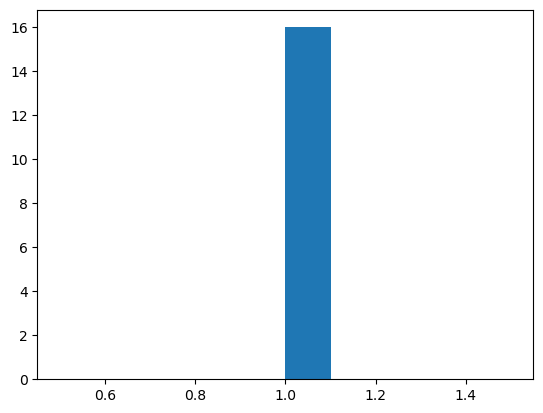

looking at limits 1, [1e-05, 100000.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[277 277 277 277 277 277 277 277 277 277 277 277 277 277 277 277]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


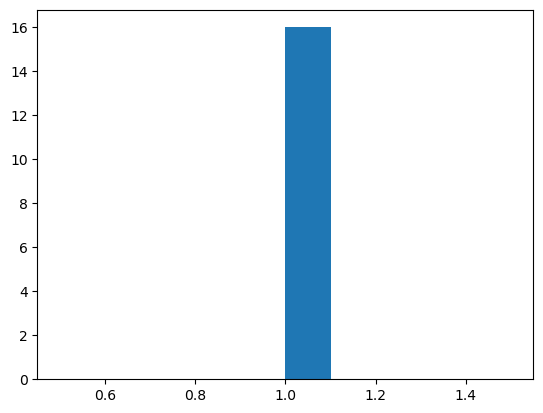

looking at limits 2, [1e-07, 10000000.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[299 299 299 299 299 299 299 299 299 299 299 299 299 299 299 299]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


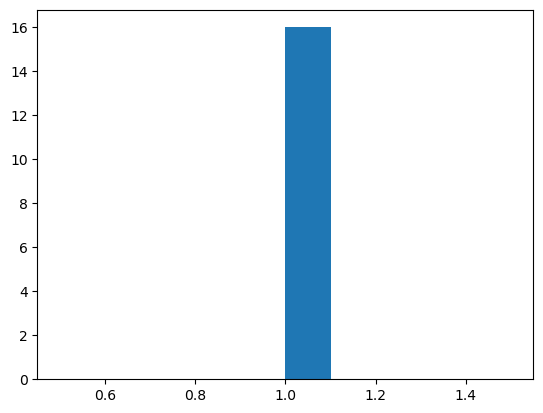

looking at limits 3, [1e-09, 1000000000.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[306 306 306 306 306 306 306 306 306 306 306 306 306 306 306 306]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


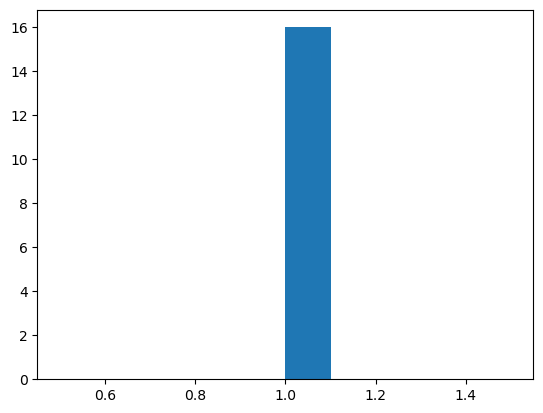

looking at limits 4, [1e-10, 10000000000.0]
16
non-analysed statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
all points analysed 16
wrong, not next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
wrong, next bin statistics:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
good statistics:
[307 307 307 307 307 307 307 307 307 307 307 307 307 307 307 307]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
16 jobs with [100, 101) % of coincident (same bin) points


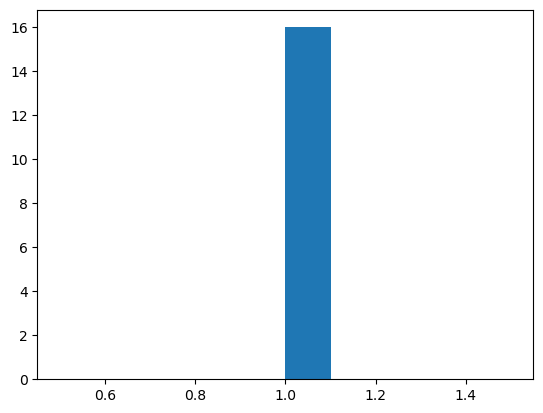

In [6]:
for i in range(len(parlims_nums)): #the last one has errors, but it is not needed as boundary already converged
    print("looking at limits %d, %s"%(i,str(extremespars[i])))
    print_statistics(all_outputs[i])